In [1]:
# http://ben.bolte.cc/blog/2016/keras-resnet.html

In [2]:
from __future__ import absolute_import, division, print_function

In [3]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist.train.images.shape

(55000, 784)

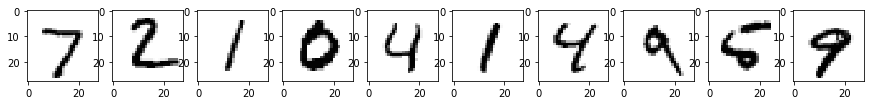

In [6]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [7]:
from keras.models import Model,Sequential
from keras.layers import Input, Dense, Activation
from keras.layers import Dropout, Flatten, Reshape, merge
from keras.layers import Convolution2D

Using TensorFlow backend.


In [8]:
def residual_block(skip=True):
    def f(input):
        conv = Convolution2D(4,3,3,border_mode='same', activation='relu')(input)        
        res  = merge([conv,input], mode='sum')
        return Activation('relu')(res) if skip else conv
    return f

In [9]:
def resnet(skiplayers=3):
    #select inception module
    _in     = Input(shape=(784,))
    reshape = Reshape((28,28,1))(_in)
    res     = Convolution2D(4,3,3,border_mode='same')(reshape)    

    for i in range(skiplayers):
        res = residual_block()(res)
    
    flat = Flatten()(res)
    flat = Dropout(0.4)(flat)
        
    _out = Dense(10, activation='softmax')(flat)
    model = Model(_in, _out)
    
    return model

In [10]:
model = resnet(10)

In [11]:
from keras.utils.layer_utils import print_summary
print_summary(model.layers)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 28, 28, 1)     0           input_1[0][0]                    
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 28, 28, 4)     40          reshape_1[0][0]                  
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 28, 28, 4)     148         convolution2d_1[0][0]            
___________________________________________________________________________________________

In [ ]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, nb_epoch=10, verbose=1, 
          validation_data=(mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 71s - loss: 0.5071 - acc: 0.8644 - val_loss: 0.1356 - val_acc: 0.9574